In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from skyfield.api import load
from skyfield import almanac

In [225]:
accidents = pd.read_csv("../PrometneNesreče.csv")
#print(len(accidents))

C:\Users\Hana\AppData\Local\Temp\ipykernel_42000\233486747.py:1: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("../PrometneNesreče.csv")


In [226]:
accidents['NastanekDatumCas'] = pd.to_datetime(accidents['NastanekDatumCas'], format='ISO8601', errors='coerce')
print(f"NastanekDatumCas column dtype: {accidents['NastanekDatumCas'].dtype}")

accidents['date'] = accidents['NastanekDatumCas'].dt.date
accidents['date'] = pd.to_datetime(accidents['date'], format='ISO8601', errors='coerce')
print(f"date column dtype: {accidents['date'].dtype}")

NastanekDatumCas column dtype: datetime64[ns]
date column dtype: datetime64[ns]


Tko bom nardila, da bom dodala en stolpec v PrometneNesreče.csv, ki bo vseboval številke (kode) za lunine mene.

Tko so definirane:
- 0 = New Moon (prazna luna)
- 1 = First Quarter (prvi krajec)
- 2 = Full Moon (polna luna)
- 3 = Last Quarter (zadnji krajec)

In bom vzela +/- 1 dan za vsako meno.

In [227]:
ts = load.timescale()
eph = load('de421.bsp')

start = ts.utc(2009, 12, 29)
end = ts.utc(2024, 1, 3)
t, y = almanac.find_discrete(start, end, almanac.moon_phases(eph))

# print(t.utc_iso())
# print(y)
# print([almanac.MOON_PHASES[yi] for yi in y])

In [ ]:
# Ustvarjanje dataframe-a
moon_df = pd.DataFrame({
    'phase_time': t.utc_datetime(),
    'moon_phase': [almanac.MOON_PHASES[yi] for yi in y]
})

# display(moon_df)

# Pretvorimo 'phase_time' v pravilen podatkovni tip in pretvorimo v pravilen časovni pas
moon_df['phase_time'] = pd.to_datetime(moon_df['phase_time'], format='ISO8601', utc=True, errors='coerce')
moon_df['phase_time'] = moon_df['phase_time'].dt.tz_convert('Europe/Ljubljana')

# Izluščimo samo datum
moon_df['date'] = moon_df['phase_time'].dt.date
moon_df['date'] = pd.to_datetime(moon_df['date'], format='ISO8601', errors='coerce')

# display(moon_df)
# moon_df.to_csv("../lunine_mene_2010_2023.csv", index=False)

,phase_time,moon_phase,date
0,2009-12-31 20:12:44.992327+01:00,Full Moon,2009-12-31
1,2010-01-07 11:39:27.980213+01:00,Last Quarter,2010-01-07
2,2010-01-15 08:11:22.206777+01:00,New Moon,2010-01-15
3,2010-01-23 11:53:23.046695+01:00,First Quarter,2010-01-23
4,2010-01-30 07:17:34.906278+01:00,Full Moon,2010-01-30
...,...,...,...
688,2023-11-27 10:16:18.591689+01:00,Full Moon,2023-11-27
689,2023-12-05 06:49:16.084497+01:00,Last Quarter,2023-12-05
690,2023-12-13 00:32:02.128085+01:00,New Moon,2023-12-13
691,2023-12-19 19:39:14.277086+01:00,First Quarter,2023-12-19


In [229]:
print(f"phase_time column dtype: {moon_df['phase_time'].dtype}")
print(f"date column dtype: {moon_df['date'].dtype}")

# print(moon_df.head())

phase_time column dtype: datetime64[ns, Europe/Ljubljana]
date column dtype: datetime64[ns]


In [246]:
from datetime import timedelta
expanded_moon_df = pd.concat([
    moon_df.assign(date=moon_df['date'] - timedelta(days=1)),
    moon_df.assign(date=moon_df['date']),
    moon_df.assign(date=moon_df['date'] + timedelta(days=1))
])

# print(expanded_moon_df.head())

accidents_moon = accidents.merge(expanded_moon_df, on='date', how='left')

accidents_moon['moon_phase'] = accidents_moon['moon_phase'].fillna('None')

accidents_moon.to_csv("../nesrece_lunine_mene_2010_2023.csv", index=False)

display(accidents_moon)

,NastanekDatumCas,WGSLat,WGSLon,Leto,Obcina,VrstaDogodka,SkupinaDogodka,Dogodek,CORSBesedilo,Opis poteka intervencije,...,VrstaPoskodbeZrak,KolicinaZrak,LjudjeMrtvi,LjudjePoskodovani,LjudjeResevani,PoginRib,PoginPtic,date,phase_time,moon_phase
0,2010-01-01 04:59:00,46.007562,15.304263,4020,SEVNICA,NESREČE V PROMETU,Nesreče v cestnem prometu,prometne nesreče,Ob 4.59 je v Sevnici zagorelo osebno vozilo. P...,B.P.; Po prihodu na prometno nesrečo smo začel...,...,NaN,0,0,0,0,0,0,2010-01-01,2009-12-31 20:12:44.992327+01:00,Full Moon
1,2010-01-01 07:41:00,45.546550,13.729435,4020,KOPER,NESREČE V PROMETU,Nesreče v cestnem prometu,prometne nesreče,Ob 7.41 je voznik z osebnim vozilom zapeljal s...,Vozilo s potniki je zdrsnilo izven vozišča. U...,...,NaN,0,0,0,0,0,0,2010-01-01,2009-12-31 20:12:44.992327+01:00,Full Moon
2,2010-01-01 16:15:00,46.383287,15.524107,4020,SLOVENSKA BISTRICA,NESREČE V PROMETU,Nesreče v cestnem prometu,prometne nesreče,Ob 16.15 so posredovali gasilci PGD Slovenska ...,"PO PRIHODU NA KRAJ SMO SLEDNJEGA ZAVAROVALI,PO...",...,NaN,0,0,0,0,0,0,2010-01-01,2009-12-31 20:12:44.992327+01:00,Full Moon
3,2010-01-02 11:14:00,46.231985,14.616350,4020,KAMNIK,NESREČE V PROMETU,Nesreče v cestnem prometu,prometne nesreče,Ob 11.14 je zapeljalo osebno vozil s cestišča ...,Gasilci PGD Kamnik so prevrnjeno vozilo s tehn...,...,NaN,0,0,0,0,0,0,2010-01-02,NaT,None
4,2010-01-02 13:12:00,46.236737,15.124345,4020,PREBOLD,NESREČE V PROMETU,Nesreče v cestnem prometu,prometne nesreče,Ob 13.15 so gasilci PGE Celje odšla na pomoč v...,Osebno vozilo je zapeljalo iz makadamske ceste...,...,NaN,0,0,0,0,0,0,2010-01-02,NaT,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33594,2023-12-31 14:20:33,46.318542,13.980634,4046,BOHINJ,NESREČE V PROMETU,Nesreče v cestnem prometu,prometne nesreče,"Ob 14:20 je na cesti Koprivnik–Goreljek, občin...","Ob 14:20 je na cesti Koprivnik - Goreljek, o...",...,NaN,0,0,0,0,0,0,2023-12-31,NaT,None
33595,2023-12-31 14:52:13,46.704488,16.131454,4046,PUCONCI,NESREČE V PROMETU,Nesreče v cestnem prometu,prometne nesreče,"Ob 14.54 je na cesti Gorica–Brezovci, občina P...","Ob 14:54 smo bili obveščeni s strani Reca Ms, ...",...,NaN,0,0,2,0,0,0,2023-12-31,NaT,None
33596,2023-12-31 20:56:32,46.276658,15.179021,6069,ŽALEC,NESREČE V PROMETU,Nesreče v cestnem prometu,prometne nesreče,Ob 20.56 je v naselju Velika Pirešica v občini...,Gasilci PGE Celje smo ob prihodu na kraj izved...,...,NaN,0,0,0,0,0,0,2023-12-31,NaT,None
33597,2023-12-31 21:12:55,46.285601,15.204133,6069,ŽALEC,NESREČE V PROMETU,Nesreče v cestnem prometu,prometne nesreče,"Ob 21.12 je v naselju Galicija, občina Žalec, ...",Gasilci PGE Celje smo ob prihodu na kraj izved...,...,NaN,0,0,0,0,0,0,2023-12-31,NaT,None


## Razporeditev nesreč glede na lunino meno

In [234]:
lunine_mene = ['Prazna luna', 'Prvi krajec', 'Polna luna', 'Zadnji krajec', 'Ostalo']
eng_lunine_mene = ['New Moon', 'First Quarter', 'Full Moon', 'Last Quarter', 'None']

In [235]:
# Število dni za vsako lunino meno in dni brez lunine mene

# Dnevi brez lunine mene (torej dnevi, ki niso +/- 1 dan od dneva lunine mene)
start_date = datetime(2010, 1, 1)
end_date = datetime(2023, 12, 31)
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
no_phase_dates = all_dates.difference(expanded_moon_df['date'])
# print(f"Days with no moon phase: {len(no_phase_dates)}")

# Dnevi z lunino meno (torej dnevi, ki so +/- 1 dan od dneva lunine mene)
count_phase_days = expanded_moon_df['moon_phase'].value_counts()
count_phase_days = count_phase_days.reindex(eng_lunine_mene)
count_phase_days['None'] = len(no_phase_dates)
print(count_phase_days)

moon_phase
New Moon          519.0
First Quarter     519.0
Full Moon         522.0
Last Quarter      519.0
None             3036.0
Name: count, dtype: float64


In [236]:
# Število prometnih nesreč pri vsaki lunini meni
count_accidents = accidents_moon['moon_phase'].value_counts()

# Sortiranje po pravem vrstnem redu luninih men
count_accidents = count_accidents.reindex(eng_lunine_mene)
#print(count_accidents)

# Izračun povprečnega števila nesreč na dan glede na lunino meno
accidents_per_day = count_accidents / count_phase_days
print(accidents_per_day)

moon_phase
New Moon         6.593449
First Quarter    6.678227
Full Moon        6.423372
Last Quarter     6.558767
None             6.572464
Name: count, dtype: float64


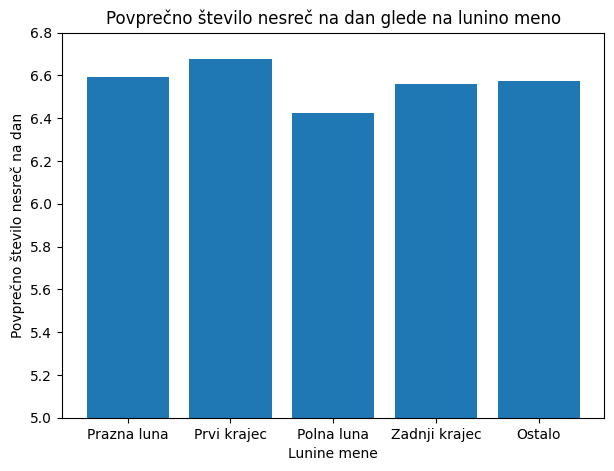

In [237]:
# Stolpčni diagram
plt.figure(figsize=(7, 5))
plt.bar(lunine_mene, accidents_per_day.values)

plt.xlabel('Lunine mene')
plt.ylabel('Povprečno število nesreč na dan')
plt.title('Povprečno število nesreč na dan glede na lunino meno')

plt.ylim(5, 6.8)    # Y-os JE SKALIRANA!!
plt.show()

## **Resnost posledic prometnih nesreč glede na lunino meno**

Tri kategorije nesreč:
- **Nesreče brez poškodovancev**: udeleženci niso bili poškodovani in nihče ni umrl
- **Nesreče s poškodbami**: nekateri udeleženci so bili poškodovani, vendar nihče ni umrl
- **Nesreče s smrtnim izidom**: vsaj eden od udeležencev je umrl (v nesreči so bili lahko tudi drugi, ki so bili poškodovani, vendar take nesreče ne štejem v kategorijo "Nesreče s poškodbami")

In [238]:
mask_no_injury = ((accidents_moon['LjudjePoskodovani'] == 0) & (accidents_moon['LjudjeMrtvi'] == 0))
mask_injury = ((accidents_moon['LjudjePoskodovani'] != 0) & (accidents_moon['LjudjeMrtvi'] == 0))
mask_death = (accidents_moon['LjudjeMrtvi'] != 0)

acc_moon_no_injury = accidents_moon[mask_no_injury]
acc_moon_injury = accidents_moon[mask_injury]
acc_moon_death = accidents_moon[mask_death]

count_no_injury = acc_moon_no_injury['moon_phase'].value_counts()
count_injury = acc_moon_injury['moon_phase'].value_counts()
count_death = acc_moon_death['moon_phase'].value_counts()

count_no_injury = count_no_injury.reindex(eng_lunine_mene)
count_injury = count_injury.reindex(eng_lunine_mene)
count_death = count_death.reindex(eng_lunine_mene)

# count_no_injury = count_no_injury.drop('None')
# count_injury = count_injury.drop('None')
# count_death = count_death.drop('None')
# print(count_no_injury)

## Nesreče brez poškodovancev

moon_phase
New Moon          914
First Quarter     954
Full Moon         933
Last Quarter     1010
None             5632
Name: count, dtype: int64


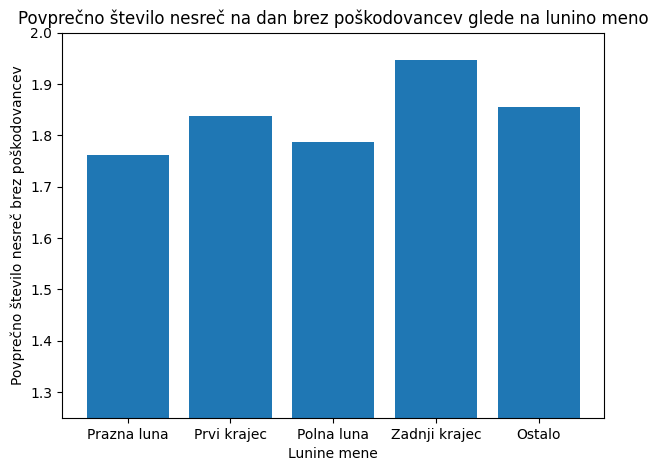

In [239]:
print(count_no_injury)

# Stolpčni diagram za nepovprečene vrednosti
# Stolpčni diagram
# plt.figure(figsize=(7, 5))
# plt.bar(lunine_mene[:-1], count_no_injury.values)

# plt.xlabel('Lunine mene')
# plt.ylabel('Število nesreč brez poškodovancev')
# plt.title('Število nesreč brez poškodovancev glede na lunino meno')

# plt.ylim(500, 1050)    # Y-os JE SKALIRANA!!
# plt.show()


# Povprečno število nesreč na dan brez poškodovancev glede na lunino meno
no_injury_per_day = count_no_injury / count_phase_days

# Stolpčni diagram
plt.figure(figsize=(7, 5))
plt.bar(lunine_mene, no_injury_per_day.values)

plt.xlabel('Lunine mene')
plt.ylabel('Povprečno število nesreč brez poškodovancev')
plt.title('Povprečno število nesreč na dan brez poškodovancev glede na lunino meno')

plt.ylim(1.25, 2)    # Y-os JE SKALIRANA!!
plt.show()

## Nesreče s poškodbami

moon_phase
New Moon          2386
First Quarter     2400
Full Moon         2293
Last Quarter      2261
None             13591
Name: count, dtype: int64


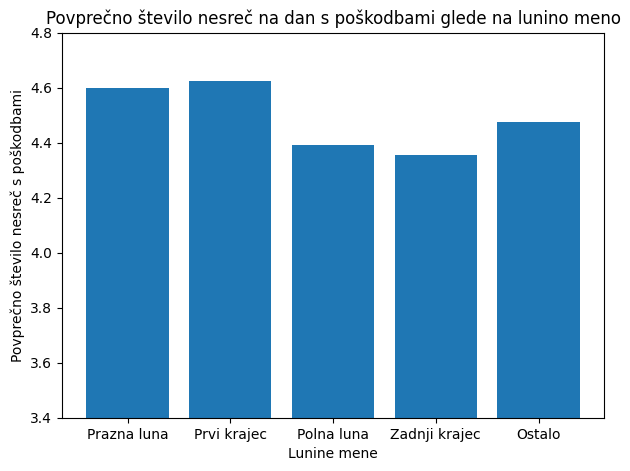

In [240]:
print(count_injury)

# Stolpčni diagram
# plt.figure(figsize=(7, 5))
# plt.bar(lunine_mene[:-1], count_injury.values)

# plt.xlabel('Lunine mene')
# plt.ylabel('Število nesreč brez poškodovancev')
# plt.title('Število nesreč brez poškodovancev glede na lunino meno')

# plt.ylim(1600, 2500)    # Y-os JE SKALIRANA!!
# plt.show()


# Povprečno število nesreč na dan brez poškodovancev glede na lunino meno
injury_per_day = count_injury / count_phase_days

# Stolpčni diagram
plt.figure(figsize=(7, 5))
plt.bar(lunine_mene, injury_per_day.values)

plt.xlabel('Lunine mene')
plt.ylabel('Povprečno število nesreč s poškodbami')
plt.title('Povprečno število nesreč na dan s poškodbami glede na lunino meno')

plt.ylim(3.4, 4.8)    # Y-os JE SKALIRANA!!
plt.show()

## Nesreče s smrtnim izidom

moon_phase
New Moon         122
First Quarter    112
Full Moon        127
Last Quarter     133
None             731
Name: count, dtype: int64


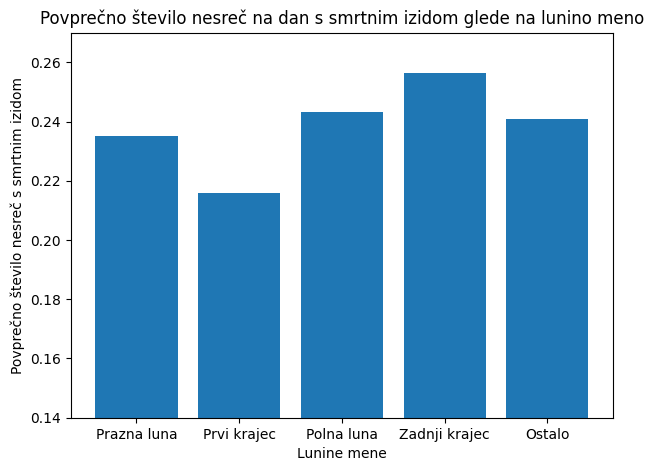

In [241]:
print(count_death)

# Stolpčni diagram
# plt.figure(figsize=(7, 5))
# plt.bar(lunine_mene[:-1], count_death.values)

# plt.xlabel('Lunine mene')
# plt.ylabel('Število nesreč s smrtnim izidom')
# plt.title('Število nesreč s smrtnim izidom glede na lunino meno')

# plt.ylim(60, 140)    # Y-os JE SKALIRANA!!
# plt.show()


# Povprečno število nesreč na dan brez poškodovancev glede na lunino meno
death_per_day = count_death / count_phase_days

# Stolpčni diagram
plt.figure(figsize=(7, 5))
plt.bar(lunine_mene, death_per_day.values)

plt.xlabel('Lunine mene')
plt.ylabel('Povprečno število nesreč s smrtnim izidom')
plt.title('Povprečno število nesreč na dan s smrtnim izidom glede na lunino meno')

plt.ylim(0.14, 0.27)    # Y-os JE SKALIRANA!!
plt.show()

### Prikaz normaliziranih vrednosti

X_norm = (X - X_min) / (X_max - X_min)

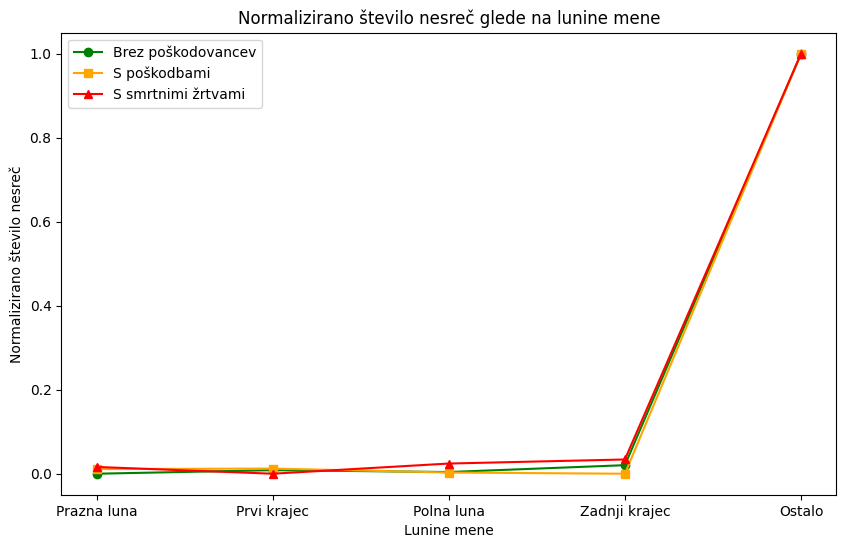

In [242]:
no_injury_norm = (count_no_injury.values - np.min(count_no_injury.values)) / (np.max(count_no_injury.values) - np.min(count_no_injury.values))
injury_norm = (count_injury.values - np.min(count_injury.values)) / (np.max(count_injury.values) - np.min(count_injury.values))
death_norm = (count_death.values - np.min(count_death.values)) / (np.max(count_death.values) - np.min(count_death.values))

plt.figure(figsize=(10, 6))

plt.plot(lunine_mene, no_injury_norm, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(lunine_mene, injury_norm, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(lunine_mene, death_norm, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.xlabel('Lunine mene')
plt.ylabel('Normalizirano število nesreč')
plt.title('Normalizirano število nesreč glede na lunine mene')
plt.legend()

plt.show()


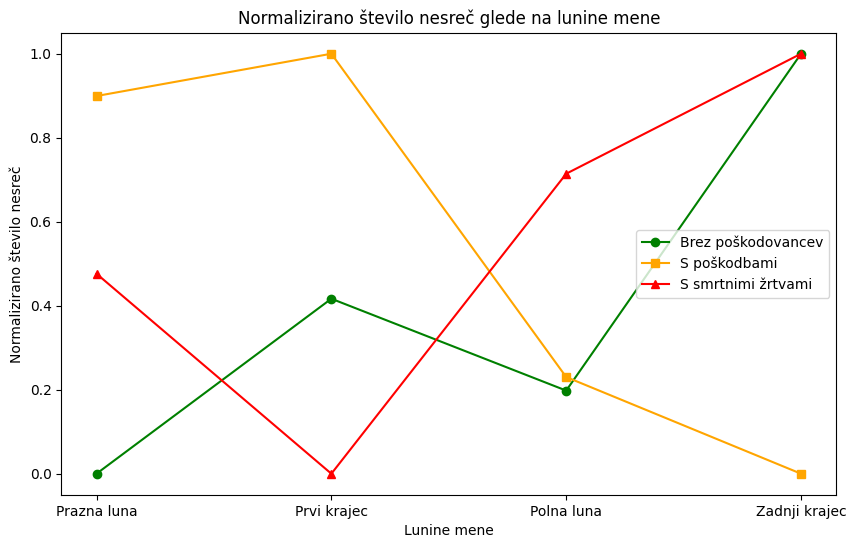

In [243]:
# Brez kategorije "Ostalo", da je malo bolj pregledno
count_no_injury = count_no_injury.drop('None')
count_injury = count_injury.drop('None')
count_death = count_death.drop('None')

no_injury_norm = (count_no_injury.values - np.min(count_no_injury.values)) / (np.max(count_no_injury.values) - np.min(count_no_injury.values))
injury_norm = (count_injury.values - np.min(count_injury.values)) / (np.max(count_injury.values) - np.min(count_injury.values))
death_norm = (count_death.values - np.min(count_death.values)) / (np.max(count_death.values) - np.min(count_death.values))

plt.figure(figsize=(10, 6))

plt.plot(lunine_mene[:-1], no_injury_norm, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(lunine_mene[:-1], injury_norm, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(lunine_mene[:-1], death_norm, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.xlabel('Lunine mene')
plt.ylabel('Normalizirano število nesreč')
plt.title('Normalizirano število nesreč glede na lunine mene')
plt.legend()

plt.show()
